<a href="https://colab.research.google.com/github/PanchiDude/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
#This is a twitter sentiment analysis program using python

#importing the required libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [137]:
#Method1
#Load the data using google libraries
#from google.colab import files
#upload_file = files.upload()

In [138]:
#log= pd.read_csv('Details.csv')

In [139]:
#consumerKey = log['key'][0]
#consumerSecret = log['key'][1]
#accessToken = log['key'][2]
#accessTokenSecret = log['key'][3]
#Method1 ends

In [140]:
#Method2
#Twitter API credentials
consumerKey = "gVrm6mtTpUhS50M7PkRumgB02"
consumerSecret = "TJ0Gt64DhyL7wRHRtKWdnlihkDPyDkigF4gmmWaI5KPkOsfpCD"
accessToken = "767765834-iUaxi0BqDEyyyUkxYTVbzpwf5Lug3cXs1krVXuuL"
accessTokenSecret = "nFLhqEAHE3fOlfPSfAxf9reze4qLF1rDcmcsZkFzRMPqa"

In [141]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#Set access token and access token secret
authenticate.set_access_token(accessToken,accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

#Print my name to confirm validation
print(api.me().name)

Priyanshu Saxena


In [142]:
#Extract 100 tweets from user or hashtags
#####posts = api.user_timeline(screen_name= "BillGates", count=100, lang = "en", tweet_mode="extended")

#To do analysis on hashtags
search_query="#farmerprotest"
posts = api.search(q=search_query,count=100,lang="en",tweet_mode='extended')

 #Print the last 5 tweets from the account
print("Show the last 5 tweet:\n")
i=1
for tweet in posts[0:5]:
 print(str(i) + ') ' + tweet.full_text + '\n')
 i = i+1

Show the last 5 tweet:

1) The Indian team wanted to support the farmers protest and mistook MSP for Minimum Score Possible.😄😄. 

#AUSvIND #INDvsAUS @BCCI @ICC #FarmerProtest #ModiWithFarmers #INDvsAUSTest

2) RT @TheDeshBhakt: #CAAProtests
#TablighiJamaat
#MigrantCrisis
#SSRDeath
#FarmerProtest
#EconomicDownturn
In 2020, every step of the way- ci…

3) RT @TheDeshBhakt: #CAAProtests
#TablighiJamaat
#MigrantCrisis
#SSRDeath
#FarmerProtest
#EconomicDownturn
In 2020, every step of the way- ci…

4) RT @AmritKLohia: Tomorrow - I’ll be joining my fellow Sikh artists from UK, CAN &amp; USA for a second event of expressing solidarity with the…

5) RT @TheDeshBhakt: #CAAProtests
#TablighiJamaat
#MigrantCrisis
#SSRDeath
#FarmerProtest
#EconomicDownturn
In 2020, every step of the way- ci…



In [143]:
#Create a dataframe with a column called Tweets (In tabular form)
df=pd.DataFrame ( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,The Indian team wanted to support the farmers ...
1,RT @TheDeshBhakt: #CAAProtests\n#TablighiJamaa...
2,RT @TheDeshBhakt: #CAAProtests\n#TablighiJamaa...
3,RT @AmritKLohia: Tomorrow - I’ll be joining my...
4,RT @TheDeshBhakt: #CAAProtests\n#TablighiJamaa...


In [144]:
#Cleaning text

#Creating a function to clean the tweets
def cleanData(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  #r tells python that expression is a raw string
  #re.sub means subtitute text matching the given pattern and replace with the second parameter i.e. ''
  text = re.sub(r'#', '', text) #removes hashtags symbol
  text = re.sub(r'RT[\s]+', '', text) #removes retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #removes hyperlink which may have https or only http

  return text
#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanData)

#Display the clean text
df

,Tweets
0,The Indian team wanted to support the farmers ...
1,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...
2,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...
3,: Tomorrow - I’ll be joining my fellow Sikh ar...
4,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...
...,...
95,_india: ~Woollen Clothes~\n\nOur teams are dis...
96,_india: ~Woollen Clothes~\n\nOur teams are dis...
97,: Breaking\nThe farmer family which hosted Ami...
98,Shame on Modi. \nFarmersDoneWithModiJumlas \nT...


In [145]:
#function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity #Subjectivity tell how subjective or opinionated the text is

#funtion to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity #Polarity is how + or - the text is

#Create two new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

#Display df with the new columns
df

,Tweets,Subjectivity,Polarity
0,The Indian team wanted to support the farmers ...,0.0,0.0
1,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0
2,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0
3,: Tomorrow - I’ll be joining my fellow Sikh ar...,0.0,0.0
4,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0
...,...,...,...
95,_india: ~Woollen Clothes~\n\nOur teams are dis...,0.6,-0.2
96,_india: ~Woollen Clothes~\n\nOur teams are dis...,0.6,-0.2
97,: Breaking\nThe farmer family which hosted Ami...,0.1,0.0
98,Shame on Modi. \nFarmersDoneWithModiJumlas \nT...,0.0,0.0


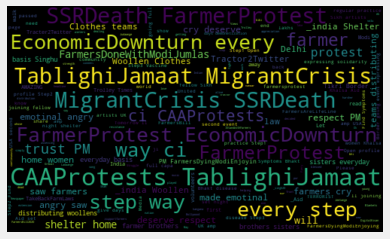

In [146]:
#Plot The Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
WordCloud = WordCloud(width = 500, height =300, random_state =21, max_font_size = 119).generate(allWords)

plt.imshow(WordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [147]:
#funtion to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#adding a new column
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Display df
df

,Tweets,Subjectivity,Polarity,Analysis
0,The Indian team wanted to support the farmers ...,0.0,0.0,Neutral
1,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0,Neutral
2,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0,Neutral
3,: Tomorrow - I’ll be joining my fellow Sikh ar...,0.0,0.0,Neutral
4,: CAAProtests\nTablighiJamaat\nMigrantCrisis\n...,0.0,0.0,Neutral
...,...,...,...,...
95,_india: ~Woollen Clothes~\n\nOur teams are dis...,0.6,-0.2,Negative
96,_india: ~Woollen Clothes~\n\nOur teams are dis...,0.6,-0.2,Negative
97,: Breaking\nThe farmer family which hosted Ami...,0.1,0.0,Neutral
98,Shame on Modi. \nFarmersDoneWithModiJumlas \nT...,0.0,0.0,Neutral


In [148]:
#Print all of the positive
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1

1) _ag01    What is common sense imposing your decision mein sirf ek baat bol rha hu jitni bhi baatien tum type kr rhe ho unka ek bhi original fact dikha do farmerprotest isupportfarmers and if you really wanna do something for nation first you have to be unbiased

2) Tomorrow - I’ll be joining my fellow Sikh artists from UK, CAN &amp; USA for a second event of expressing solidarity with the farmerprotest - I’ll be bringing my Lauryn Hill back for this! I am so proud of out community! ✊🏽 

3) : India is first nation in the world where a law is passed first and then Govt offers to discuss it. 

farmersprotest S…

4) great reporter
FarmerProtest 
dafakarojionu 
FarmersDyingModiEnjoying 

5) _Aid: The volunteers helping the farmers at the protest are simply AMAZING !!! ⁣
⁣
Let’s show them our love &amp; appreciation 👏🏼👏🏼👏🏼…

6) : Own Struggle, Own Protests, Own Newspaper: Trolley Times FarmerProtest 

7) : PLEASE KEEP YOUR LANGUAGE CLEAN !! 

I know emotions are running high but let’s not

In [149]:
#Print all of the negative in descending order
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1

1) CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
EconomicDownturn
In 2020, every step of the way- citizens were misguided, misdirected &amp; mocked for asking hard questions
2020 Rewind - DeshBhakt Year End Maha Episode. Watch / Share -   

2) _Itsok:  Sir, Please include in it FarmerProtest due to which in Delhi major borders are blocked, Trains are not runnin…

3) _india: ~Woollen Clothes~

Our teams are distributing woollens to our farmer brothers and sisters on everyday basis at Singhu…

4) what will and strength this bibi ji has to say she will not walk away until this ends! May that be she walks away alive or dead 🙏 spirit womeninthefrontline FarmBills2020 FarmersProtestDelhi2020 FarmerProtest 

5) _india: ~Woollen Clothes~

Our teams are distributing woollens to our farmer brothers and sisters on everyday basis at Singhu…

6) : Farmers dying-Ok Farmers eating Pizza -Not Ok.Indian media is long dead inside. FarmerProtest  …

7) _india: ~Woollen Clothes~

Our tea

In [150]:
#Print all of the Neutral
j=1

sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] +'\n')
    #print()
    j=j+1
"""
#sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, df.shape[0]): #Number of rows in a df
  if (sortedDF['Analysis'][i]=='Neutral'):
    print(str(j) + ') ' + df['Tweets'][i] +'\n')
    #print()
    j=j+1
"""

1) The Indian team wanted to support the farmers protest and mistook MSP for Minimum Score Possible.😄😄. 

AUSvIND INDvsAUS   FarmerProtest ModiWithFarmers INDvsAUSTest

2) : CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
EconomicDownturn
In 2020, every step of the way- ci…

3) : CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
EconomicDownturn
In 2020, every step of the way- ci…

4) : Tomorrow - I’ll be joining my fellow Sikh artists from UK, CAN &amp; USA for a second event of expressing solidarity with the…

5) : CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
EconomicDownturn
In 2020, every step of the way- ci…

6) : CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
EconomicDownturn
In 2020, every step of the way- ci…

7) : Tomorrow - I’ll be joining my fellow Sikh artists from UK, CAN &amp; USA for a second event of expressing solidarity with the…

8) : CAAProtests
TablighiJamaat
MigrantCrisis
SSRDeath
FarmerProtest
Econ

"\n#sortedDF = df.sort_values(by=['Polarity'])\nfor i in range(0, df.shape[0]): #Number of rows in a df\n  if (sortedDF['Analysis'][i]=='Neutral'):\n    print(str(j) + ') ' + df['Tweets'][i] +'\n')\n    #print()\n    j=j+1\n"

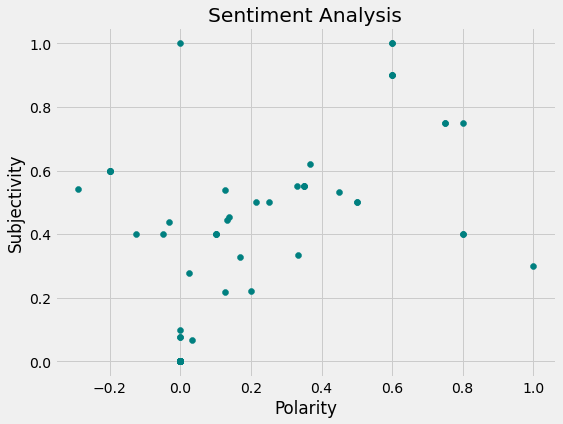

In [151]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Teal') 
  #(x-axis, y-axis, color)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [152]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
#ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

33.0

In [153]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
#ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

9.0

In [154]:
#Get the percentage of Neutral tweets
neutraltweets = df[df.Analysis == 'Neutral']
#neutraltweets = neutraltweets['Tweets']

round( (neutraltweets.shape[0] / df.shape[0]) *100, 1)

58.0

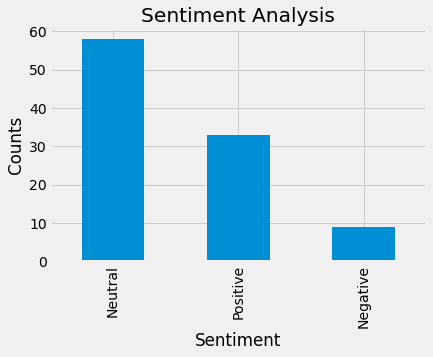

In [155]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

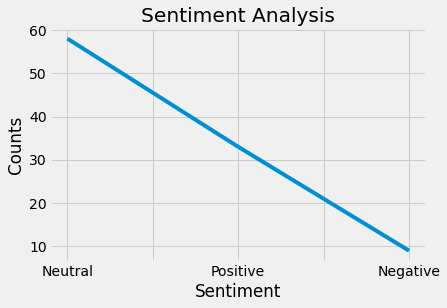

In [156]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

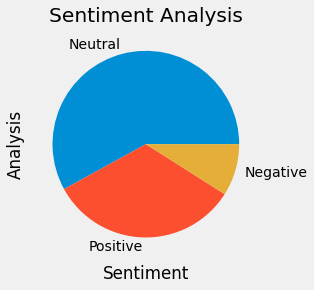

In [157]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()